# Análisis de Reglas de Asociación en un Dataset de Compras

Este proyecto tiene como objetivo aplicar técnicas de minería de datos, específicamente reglas de asociación. Utilizaremos el algoritmo Apriori para descubrir patrones frecuentes en las compras realizadas por los clientes.

El trabajo se ha dividido en varias fases: carga y preprocesado, exploración, aplicación del algoritmo y análisis de resultados.

In [26]:
# Importación de librerías
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Configurar matplotlib para evitar warnings relacionados con fuentes
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

## Parte 1: Carga y Preprocesamiento de Datos

En esta sección se realiza la exploración inicial y limpieza del dataset para prepararlo para el algoritmo Apriori. Se cargan los datos desde un archivo CSV, transformando cada transacción en una lista de productos y eliminando valores vacíos. Se identifican los productos únicos y se crea un DataFrame binario donde cada fila representa una transacción y cada columna un producto, indicando con 1 si el producto está presente.

In [106]:
# Lectura del archivo CSV
df = pd.read_csv('groceries.csv', sep=";", header= None)
df.head()

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [107]:
# Tamaño y estructura
print(df.shape)

df.info()

(9835, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
dtypes: object(1)
memory usage: 77.0+ KB


In [65]:
# Carga de datos y limpieza básica
dataset = []
for line in df.values:
    items = line[0].strip().split(',') 
    items = [item for item in items if item != '']
    dataset.append(items)

# Mostrar cuántas transacciones hay
print(f"Número total de transacciones: {len(dataset)}")

Número total de transacciones: 9835


In [ ]:
# Crear un conjunto para almacenar los productos únicos de todas las transacciones
productos_unicos = set(item for transaccion in dataset for item in transaccion)

# Convertir el conjunto a una lista
productos_unicos_lista = list(productos_unicos)

# Mostrar los productos únicos
print(f"Número total de productos únicos: {len(productos_unicos_lista)}")


['beverages', 'turkey', 'photo/film', 'hamburger meat', 'pickled vegetables', 'canned fish', 'liquor (appetizer)', 'salad dressing', 'syrup', 'nut snack', 'baby food', 'mayonnaise', 'specialty fat', 'meat', 'coffee', 'artif. sweetener', 'snack products', 'sugar', 'female sanitary products', 'baby cosmetics', 'spices', 'liqueur', 'rice', 'condensed milk', 'oil', 'detergent', 'domestic eggs', 'tropical fruit', 'organic products', 'chocolate marshmallow', 'cake bar', 'prosecco', 'frozen fruits', 'soft cheese', 'liquor', 'whisky', 'yogurt', 'dessert', 'organic sausage', 'cereals', 'frankfurter', 'waffles', 'tea', 'dog food', 'kitchen utensil', 'cling film/bags', 'brandy', 'ketchup', 'canned vegetables', 'frozen vegetables', 'nuts/prunes', 'curd', 'butter', 'seasonal products', 'sparkling wine', 'rum', 'ice cream', 'packaged fruit/vegetables', 'toilet cleaner', 'pip fruit', 'liver loaf', 'light bulbs', 'vinegar', 'soda', 'mustard', 'whole milk', 'newspapers', 'chewing gum', 'cleaner', 'cat 

In [72]:
# Convertir la lista a un DataFrame
apriori_df = pd.DataFrame(columns=productos_unicos_lista)

# Mostrar el DataFrame
apriori_df

,beverages,turkey,photo/film,hamburger meat,pickled vegetables,canned fish,liquor (appetizer),salad dressing,syrup,nut snack,...,honey,abrasive cleaner,bottled beer,fruit/vegetable juice,canned beer,brown bread,zwieback,other vegetables,dish cleaner,flour


In [ ]:
# Crear un DataFrame vacío con las columnas de productos únicos
apriori = pd.DataFrame(0, index=range(len(dataset)), columns=productos_unicos_lista)

# Rellenar el DataFrame con 1 si el producto está presente en la transacción
for i, transaction in enumerate(dataset):
    apriori.loc[i, transaction] = 1

# Mostrar el DataFrame que se usará en el algoritmo Apriori
apriori.head()


,beverages,turkey,photo/film,hamburger meat,pickled vegetables,canned fish,liquor (appetizer),salad dressing,syrup,nut snack,...,honey,abrasive cleaner,bottled beer,fruit/vegetable juice,canned beer,brown bread,zwieback,other vegetables,dish cleaner,flour
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [76]:
apriori.shape

(9835, 171)

In [77]:
apriori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 171 entries, beverages to flour
dtypes: int64(171)
memory usage: 12.8 MB


## Parte 2: Exploración de los Datos

En esta fase, se realiza un análisis exploratorio del conjunto de datos para comprender mejor su estructura y características. Se llevan a cabo diversas tareas de análisis y visualización de datos. Estas incluyen la exploración de las transacciones, el análisis de la frecuencia de los productos, la visualización de los productos más comprados, el cálculo de porcentajes de compra, y el análisis de patrones en las compras.

Longitud media de las transacciones: 4.41 productos


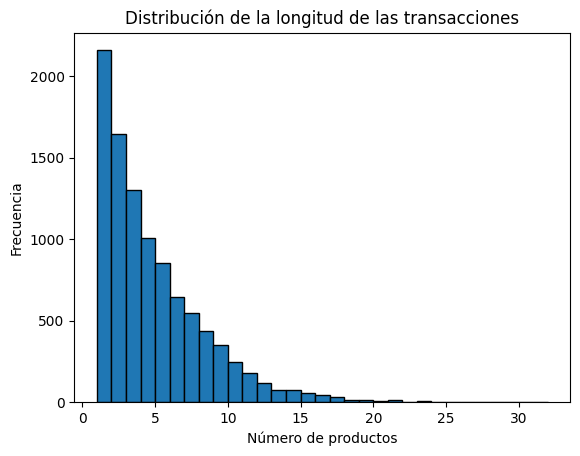

In [114]:
# Exploración de las transacciones
# Media de la longitud de las transacciones
longitudes = [len(transaccion) for transaccion in dataset]
print(f"Longitud media de las transacciones: {sum(longitudes)/len(longitudes):.2f} productos")

# Visualización de la longitud de las transacciones
plt.hist(longitudes, bins=range(1, max(longitudes)+1), edgecolor='black')
plt.title("Distribución de la longitud de las transacciones")
plt.xlabel("Número de productos")
plt.ylabel("Frecuencia")
plt.show()


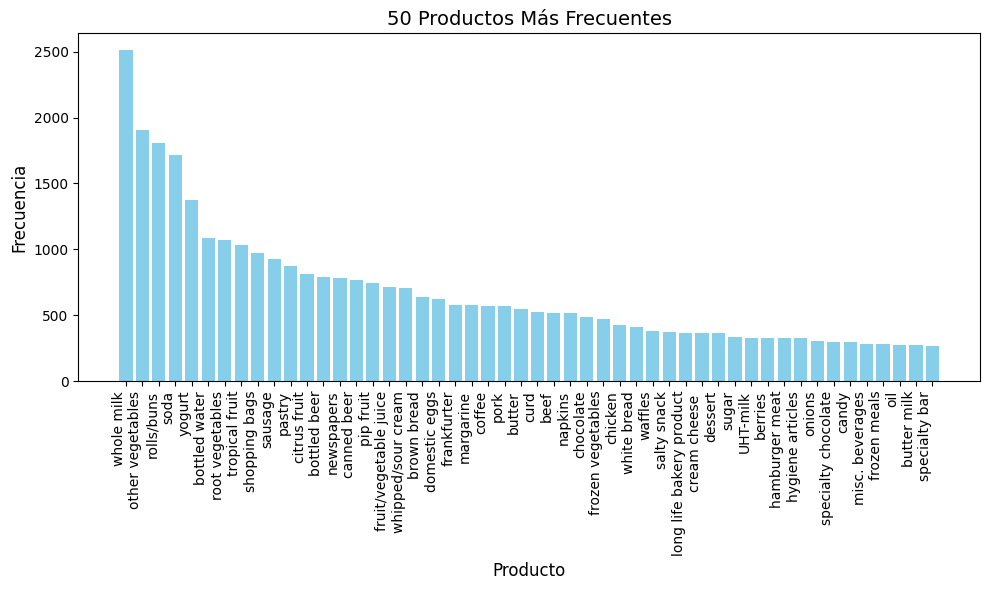

In [112]:
# Análisis de frecuencia de productos
items_series = pd.Series([item for sublist in dataset for item in sublist])
frecuencia_productos = items_series.value_counts().reset_index()
frecuencia_productos.columns = ['Producto', 'Frecuencia']

# Crear una gráfica de barras para visualizar las frecuencias de los productos
plt.figure(figsize=(10, 6))
plt.bar(frecuencia_productos['Producto'][:50], frecuencia_productos['Frecuencia'][:50], color='skyblue')
plt.title('50 Productos Más Frecuentes', fontsize=14)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [133]:
# Calcular la cantidad de artículos comprados y no comprados
comprados = apriori.sum(axis=0)
no_comprados = len(apriori) - comprados

# Crear un DataFrame para mostrar los resultados
compras_producto = pd.DataFrame({
    'Purchased': comprados,
    'Not Purchased': no_comprados,
})

# Ordernar el DataFrame por la cantidad de productos comprados
compras_producto = compras_producto.sort_values(by='Purchased', ascending=False)

compras_producto

,Purchased,Not Purchased
whole milk,2513,7322
other vegetables,1903,7932
rolls/buns,1809,8026
soda,1715,8120
yogurt,1372,8463
...,...,...
bags,4,9831
kitchen utensil,4,9831
preservation products,2,9833
baby food,1,9834


In [ ]:
# Añadir el porcentaje de compras de cada producto
compras_producto['Purchase Percentage'] = (compras_producto['Purchased'] / sum(compras_producto['Purchased'])) * 100
compras_producto.head()


,Purchased,Not Purchased,Purchase Percentage
whole milk,2513,7322,5.794729
other vegetables,1903,7932,4.388129
rolls/buns,1809,8026,4.171375
soda,1715,8120,3.954620
yogurt,1372,8463,3.163696


In [ ]:
# Calcular la media del porcentaje de compras
media_porcentaje_compras = compras_producto['Purchase Percentage'].mean()
print(f"La media del porcentaje de productos comprados es: {media_porcentaje_compras:.2f}%")

La media del porcentaje de productos comprados es: 0.58%
